<a href="https://colab.research.google.com/github/Nasthl/macnine-learning-/blob/main/%5BCOLAB%5D_Copy_of_puste_Zadania_regresja_liniowa_i_logistyczna_zaj%C4%99cia_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Zadanie Regresja liniowa

Zbiór danych składa się z informacji dotyczących różnych krajów. Poszczególne kolumny w zbiorze to:

1. Country: Nazwa kraju.
GDP per capita: Produkt krajowy brutto (Gross Domestic Product) per capita, czyli wartość całkowitej produkcji w kraju podzielona przez liczbę ludności.
2. Mierzy ono ekonomiczną wydajność i bogactwo kraju na jednego mieszkańca.
* Life expectancy: Średnia oczekiwana długość życia w danym kraju, czyli przewidywana liczba lat, jakie przeciętnie żyje mieszkaniec danego kraju. Jest to ważny wskaźnik zdrowia i jakości życia w danym kraju.
* Population: Liczba ludności w danym kraju. Jest to liczba osób zamieszkujących ten kraj.
* Continent: Kontynent, do którego należy dany kraj.


In [ ]:
import pandas as pd
import numpy as np
income_df = pd.read_csv('https://raw.githubusercontent.com/marcin119a/PUMP2/main/income.csv', sep=';')
income_df.head()

,Country,GDP per capita,Life expectancy,Population,Continent
0,Lesotho,2598,47.1,2174645,Africa
1,Central African Republic,599,49.6,4546100,Africa
2,Swaziland,6095,51.8,1319011,Africa
3,Afghanistan,1925,53.8,33736494,Asia
4,Somalia,624,54.2,13908129,Africa


In [ ]:
income_df.corr()

<ipython-input-69-a2139dc27336>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  income_df.corr()


,GDP per capita,Life expectancy,Population
GDP per capita,1.000000,0.606116,-0.051519
Life expectancy,0.606116,1.000000,0.002720
Population,-0.051519,0.002720,1.000000


In [ ]:
# Wczytanie zbioru danych
X = income_df[['GDP per capita', 'Population']].to_numpy()
y = income_df['Life expectancy'].to_numpy()

X

array([[      2598,    2174645],
       [       599,    4546100],
       [      6095,    1319011],
       [      1925,   33736494],
       [       624,   13908129],
       [      1386,    1770526],
       [      3047,   11882136],
       [      4034,   16100587],
       [      1176,   28010691],
       [      2085,    7237025],
       [      2191,   14009413],
       [     17196,    2209197],
       [      1225,   12091533],
       [      3491,   23108472],
       [      1801,   15777451],
       [      2897,   22834522],
       [      7615,   27859305],
       [      1684,   17467905],
       [       799,   17573607],
       [       809,   76196619],
       [      1654,   18110624],
       [      2529,    7919825],
       [       943,   19896965],
       [     31087,    1175389],
       [      1680,   40144870],
       [     12509,   55291225],
       [       777,   10199270],
       [      1433,    7416802],
       [      6220,    4995648],
       [      1830,   10575952],
       [  

Wykorzystując zbiór danych "income.csv" oraz zbiór treningowy i testowy,  napisz program w języku Python, który tworzy prosty model liniowy, trenuje go na zbiorze treningowym i dokonuje predykcji średniej długości życia ```Life expectancy``` na podstawie zmiennych ```GDP per capita``` i ```Populaction```.

* Wczytaj zbiór danych "income.csv" i wyświetl 10 pierwszych wierszy.

* Podziel zbiory na macierze cech X i wektor zmiennych objaśniających y w opraciu o kolumny Life expectancy, GDP per capita, Populaction. Przygotuj standaryzacja z score dla macierzy cech $X$.

* Podziel zbiór na zbiór treningowy i testowy w stosunku 80:20. Wykorzystaj do tego indeksowanie z biblioteki numpy.


* Wykorzystaj kod z wykładu do stworzenia modelu liniowego i jego trenowania na zbiorze treningowym.


* Narysuj wykres scatter plot porównujący rzeczywiste Life expectancy z predykcją.

Zbadaj wyjaśnialność współczynników modelu:
* Oblicz wartości współczynników regresji liniowej.
*  Interpretuj znaczenie każdego współczynnika w kontekście przewidywania średniej długości życia.
* Wykonaj wizualizację wpływu poszczególnych cech na przewidywaną średnią długości życia, na przykład za pomocą wykresu kolumnowego (taki jak na wyjkładzie).


1. Wczytaj zbiór danych "income.csv" i wyświetl 10 pierwszych wierszy

In [ ]:
income_df.head(10)

,Country,GDP per capita,Life expectancy,Population,Continent
0,Lesotho,2598,47.1,2174645,Africa
1,Central African Republic,599,49.6,4546100,Africa
2,Swaziland,6095,51.8,1319011,Africa
3,Afghanistan,1925,53.8,33736494,Asia
4,Somalia,624,54.2,13908129,Africa
5,Guinea-Bissau,1386,55.6,1770526,Africa
6,South Sudan,3047,56.1,11882136,Africa
7,Zambia,4034,56.7,16100587,Africa
8,Mozambique,1176,57.1,28010691,Africa
9,Sierra Leone,2085,57.1,7237025,Africa


2. Podziel zbiory na macierze cech X i wektor zmiennych objaśniających y w opraciu o kolumny Life expectancy, GDP per capita, Populaction. Przygotuj standaryzacja z score dla macierzy cech $X$.


In [ ]:
X_std=(X-X.mean())/X.std()
X_std


array([[-1.88825880e-01, -1.67401139e-01],
       [-1.88845598e-01, -1.44009469e-01],
       [-1.88791386e-01, -1.75840983e-01],
       [-1.88832518e-01,  1.43920130e-01],
       [-1.88845351e-01, -5.16638410e-02],
       [-1.88837835e-01, -1.71387308e-01],
       [-1.88821451e-01, -7.16479273e-02],
       [-1.88811716e-01, -3.00377694e-02],
       [-1.88839906e-01,  8.74416817e-02],
       [-1.88830940e-01, -1.17466594e-01],
       [-1.88829895e-01, -5.06647911e-02],
       [-1.88681888e-01, -1.67060324e-01],
       [-1.88839423e-01, -6.95824672e-02],
       [-1.88817072e-01,  3.90869404e-02],
       [-1.88833741e-01, -3.32251337e-02],
       [-1.88822931e-01,  3.63847394e-02],
       [-1.88776393e-01,  8.59484332e-02],
       [-1.88834896e-01, -1.65507530e-02],
       [-1.88843625e-01, -1.55081246e-02],
       [-1.88843526e-01,  5.62740333e-01],
       [-1.88835191e-01, -1.02110707e-02],
       [-1.88826561e-01, -1.10731559e-01],
       [-1.88842205e-01,  7.40912473e-03],
       [-1.

3. Podziel zbiór na zbiór treningowy i testowy w stosunku 80:20. Wykorzystaj do tego indeksowanie z biblioteki numpy.


In [ ]:
train_size=int(0.8*len(X))
X_train,y_train=X_std[:train_size], y[:train_size]
X_test,y_test=X_std[train_size:], y[train_size:]


4. Wykorzystaj kod z wykładu do stworzenia modelu liniowego i jego trenowania na zbiorze treningowym.


In [ ]:
def rmse(X, y, theta):
    return np.sqrt(np.mean(np.dot(X, theta) - y) ** 2)

def prediction(X, theta):
    # Compute predictions
    y_pred = np.dot(X, theta)
    return y_pred

def linear_regression_gd(X, y, learning_rate=0.01, num_iterations=1000, logging_period=100):
    """
    Performs gradient descent based linear regression on the input data.

    Parameters:
    X (ndarray): A NumPy array of shape (n_samples, n_features) representing the input features.
    y (ndarray): A NumPy array of shape (n_samples,) representing the target variable.
    learning_rate (float): The learning rate for gradient descent. Default is 0.01.
    num_iterations (int): The number of iterations for gradient descent. Default is 1000.

    Returns:
    theta (ndarray): A NumPy array of shape (n_features+1,) representing the learned parameters (including bias term).
    losses (list): values of loss function being optimized after each optimization step
    """
    # Add bias term to X
    X = np.insert(X, 0, 1, axis=1)

    # Initialize parameters to zeros
    theta = np.zeros(X.shape[1])
    losses = []


    def gradient(X, theta):
      y_pred = prediction(X, theta)
      # Compute errors
      errors = y_pred - y
      # Compute gradients
      gradients = np.dot(X.T, errors) / len(X)
      return gradients

    # Perform gradient descent
    for i in range(num_iterations):
        # Update parameters
        theta -= learning_rate * gradient(X, theta)

        cost = rmse(X, y, theta)
        losses.append(cost)

        if i % logging_period == 0:
          print(f"RMSE after iteration {i}: {cost}")

    return theta, losses

In [ ]:

theta,losses=linear_regression_gd(X_train,y_train, learning_rate=0.01, num_iterations=1000, logging_period=100)

RMSE after iteration 0: 68.8654152550178
RMSE after iteration 100: 24.04673324866782
RMSE after iteration 200: 8.730297232275328
RMSE after iteration 300: 3.1979323533699553
RMSE after iteration 400: 1.1737583014846198
RMSE after iteration 500: 0.4310338881755372
RMSE after iteration 600: 0.15833616674966516
RMSE after iteration 700: 0.05819893470665872
RMSE after iteration 800: 0.021426455920767147
RMSE after iteration 900: 0.007922744681580482



Zbadaj wyjaśnialność współczynników modelu:
* Oblicz wartości współczynników regresji liniowej.
*  Interpretuj znaczenie każdego współczynnika w kontekście przewidywania średniej długości życia.
* Wykonaj wizualizację wpływu poszczególnych cech na przewidywaną średnią długości życia, na przykład za pomocą wykresu kolumnowego (taki jak na wykładzie).

In [ ]:
theta

array([ 67.17630179, -12.67385639,   0.23294897])

<BarContainer object of 2 artists>

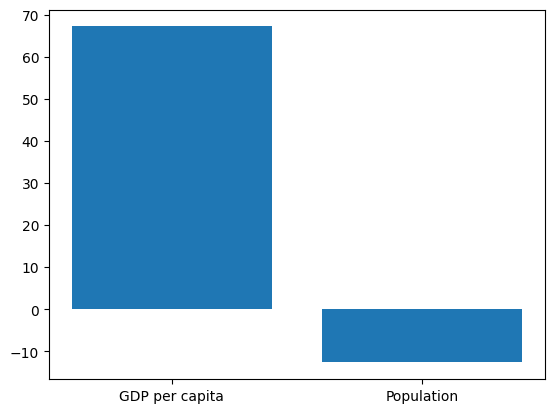

In [ ]:
theta
import matplotlib.pyplot as plt
plt.bar(['GDP per capita','Population'], theta[:-1])


### Zadanie regresja logistyczna

Treść zadania:

W ramach tego zadania, Twoim celem jest przewidzenie, które osoby przetrwają katastrofę na statku Titanic na podstawie dostępnych informacji. Zbiór danych "Titanic" zawiera informacje o pasażerach, takie jak wiek, płeć, klasa podróży, opłata za bilet itp.

Twoim zadaniem jest zastosowanie regresji logistycznej przy użyciu biblioteki Keras do stworzenia modelu przewidującego, czy dany pasażer przetrwał katastrofę na podstawie jego cech.

Kroki do wykonania:

* Wczytaj zbiór danych Titanic.
* Przygotuj dane:
* Wybierz odpowiednie cechy (np. wiek, płeć, klasa podróży) jako zmienne niezależne.
* Wybierz zmienną zależną, czy pasażer przetrwał (1) lub nie (0).
* Podziel zbiór danych na zbiór treningowy i testowy.
* Standaryzuj cechy, aby zapewnić podobną skalę.
* Zdefiniuj model regresji logistycznej taki jak na wykładzie.
* Przygotuj trening modelu na danych treningowych.


* Wczytaj zbiór danych Titanic.

In [ ]:
import pandas as pd
titanic_numeric = pd.read_csv('https://raw.githubusercontent.com/marcin119a/PUMP2/main/titanic_numeric.csv')
titanic_numeric.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [ ]:
titanic_numeric.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036186,-0.057527,-0.001652,0.012658,-0.030444
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307,0.111203
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500,0.040138
Sex,0.042939,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333,-0.121266
Age,0.036186,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554,-0.041852
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651,-0.061591
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225,-0.080277
Fare,0.012658,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000,0.065492
Embarked,-0.030444,0.111203,0.040138,-0.121266,-0.041852,-0.061591,-0.080277,0.065492,1.000000


* Przygotuj dane:
* Wybierz odpowiednie cechy (np. wiek, płeć, klasa podróży) jako zmienne niezależne.

In [ ]:
X=titanic_numeric[['Age','Sex','Pclass']].to_numpy()

* Wybierz zmienną zależną, czy pasażer przetrwał (1) lub nie (0).
* Podziel zbiór danych na zbiór treningowy i testowy.

In [ ]:
y=titanic_numeric['Survived'].to_numpy()
train_size=int(0.8*len(titanic_numeric))
X_std=((X-X.mean())/X.std())
X_train, y_train=X_std[:train_size], y[:train_size]
X_test, y_test=X_std[train_size:], y[train_size:]

* Standaryzuj cechy, aby zapewnić podobną skalę.


* Zdefiniuj model regresji logistycznej taki jak na wykładzie.


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def accuracy(X, theta, y):
    return (prediction(X, theta) == y).sum() / y.shape[0]

def prediction(X, theta):
    # Compute predictions
    X = np.insert(X, 0, 1, axis=1)
    return sigmoid(X.dot(theta)) >= 1/2


def logistic_regression_gd(X, y, learning_rate=0.01, num_iterations=1000, logging_period=100):
    """
    Performs gradient descent based logistic regression on the input data.

    Parameters:
    X (ndarray): A NumPy array of shape (n_samples, n_features) representing the input features.
    y (ndarray): A NumPy array of shape (n_samples,) representing the target variable.
    learning_rate (float): The learning rate for gradient descent. Default is 0.01.
    num_iterations (int): The number of iterations for gradient descent. Default is 1000.

    Returns:
    theta (ndarray): A NumPy array of shape (n_features+1,) representing the learned parameters (including bias term).
    losses (list): values of loss function being optimized after each optimization step
    """
    losses = []

    # Define the sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Define the cost function
    def H(theta, X, y):
        m = len(y)
        h = sigmoid(X.dot(theta))
        J = -(1/m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
        return J

    # Define the gradient function
    def gradient(theta, X, y):
        m = len(y)
        h = sigmoid(X.dot(theta))
        grad = (1/m) * X.T.dot(h-y)
        return grad

    # Add bias term to X
    X = np.insert(X, 0, 1, axis=1)

    # Initialize parameters to zeros
    theta = np.zeros(X.shape[1])

    # Perform gradient descent
    for i in range(num_iterations):
        cost = H(theta, X, y)
        losses.append(cost)
        grad = gradient(theta, X, y)
        theta = theta - learning_rate * grad

        if i % logging_period == 0:
            print(f"Cost after iteration {i}: {cost}")


    return theta, losses

* Przygotuj trening modelu na danych treningowych.

In [ ]:
theta, losses=logistic_regression_gd(X_train,y_train, learning_rate=0.01, num_iterations=10000)

Cost after iteration 0: 0.6931471805599452
Cost after iteration 100: 0.6724607024496166
Cost after iteration 200: 0.6689646394970168
Cost after iteration 300: 0.6682799279988026
Cost after iteration 400: 0.668080855397833
Cost after iteration 500: 0.667968340702259
Cost after iteration 600: 0.6678715357535866
Cost after iteration 700: 0.667777659419592
Cost after iteration 800: 0.6676843871036758
Cost after iteration 900: 0.667591292484224
Cost after iteration 1000: 0.6674982953917259
Cost after iteration 1100: 0.6674053791679488
Cost after iteration 1200: 0.6673125390627477
Cost after iteration 1300: 0.6672197727659968
Cost after iteration 1400: 0.6671270786366135
Cost after iteration 1500: 0.6670344553434837
Cost after iteration 1600: 0.6669419017698743
Cost after iteration 1700: 0.6668494169707535
Cost after iteration 1800: 0.6667570001438029
Cost after iteration 1900: 0.6666646506063164
Cost after iteration 2000: 0.6665723677760265
Cost after iteration 2100: 0.6664801511550357
Cost

In [ ]:
theta


array([-0.71419273, -0.19497237, -0.35564121, -0.53403527])

###  Regresja logistyczna – realny problem


Zadanie związane z zastosowaniem modelu regresji logistycznej do rozróżniania dwóch klas w zbiorze danych Fashion MNIST:

---


Twoim zadaniem jest zastosowanie modelu regresji logistycznej do rozróżniania dwóch klas w zbiorze danych Fashion MNIST: T-shirt/top (Koszulka / Top) oznaczony jako 0 i Trouser (Spodnie) oznaczony jako 1.

Kroki do wykonania:

1. Wczytaj zbiór danych Fashion MNIST.
2. Przygotuj dane:
   - Ogranicz zbiór danych tylko do klas T-shirt/top (0) i Trouser (1).
   - Podziel zbiór danych na macierz cech X i wektor etykiet y.
   - Standaryzuj wartości cech X, aby miały średnią równą zero i jednostkowe odchylenie standardowe.
   - Podziel zbiór danych na zbiór treningowy i testowy.
3. Stwórz i wytrenuj model regresji logistycznej:
   - Wykorzystaj kod z wykładu.
   - Skonfiguruj model, określając funkcję kosztu jako binary cross-entropy.
   - Wytrenuj model na danych treningowych.
4. Dokonaj predykcji na zbiorze testowym:
   - Użyj wytrenowanego modelu do przewidywania etykiet na danych testowych.
   - Otrzymasz wektor wynikowy, w którym dla każdego przykładu zostanie przewidziana klasa (0 lub 1).


Oczekiwany wynik:
- Model regresji logistycznej powinien być w stanie skutecznie rozróżniać koszulki od spodni na podstawie obrazów.
- Ocena jakości modelu i wizualizacje pomogą w zrozumieniu, jak dobrze model sobie radzi z klasyfikacją obu klas.


---

1. Wczytaj zbiór danych Fashion MNIST.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


2. Przygotuj dane:
   - Ogranicz zbiór danych tylko do klas T-shirt/top (0) i Trouser (1).
   - Podziel zbiór danych na macierz cech X i wektor etykiet y.
   - Standaryzuj wartości cech X, aby miały średnią równą zero i jednostkowe odchylenie standardowe.

In [ ]:
X_train=train_images[(train_labels== 0) | (train_labels== 1)].reshape(-1,784)
X_test=test_images[(test_labels== 0) | (test_labels== 1)].reshape(-1,784)
y_train=train_labels[(train_labels== 0) | (train_labels== 1)]
y_test=test_labels[(test_labels== 0) | (test_labels== 1)]

X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()


3. Stwórz i wytrenuj model regresji logistycznej:
   - Wykorzystaj kod z wykładu.
   - Skonfiguruj model, określając funkcję kosztu jako binary cross-entropy.
   - Wytrenuj model na danych treningowych.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def accuracy(X, theta, y):
    return (prediction(X, theta) == y).sum() / y.shape[0]

def prediction(X, theta):
    # Compute predictions
    X = np.insert(X, 0, 1, axis=1)
    return sigmoid(X.dot(theta)) >= 1/2


def logistic_regression_gd(X, y, learning_rate=0.01, num_iterations=1000, logging_period=100):
    """
    Performs gradient descent based logistic regression on the input data.

    Parameters:
    X (ndarray): A NumPy array of shape (n_samples, n_features) representing the input features.
    y (ndarray): A NumPy array of shape (n_samples,) representing the target variable.
    learning_rate (float): The learning rate for gradient descent. Default is 0.01.
    num_iterations (int): The number of iterations for gradient descent. Default is 1000.

    Returns:
    theta (ndarray): A NumPy array of shape (n_features+1,) representing the learned parameters (including bias term).
    losses (list): values of loss function being optimized after each optimization step
    """
    losses = []

    # Define the sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Define the cost function
    def H(theta, X, y):
        m = len(y)
        h = sigmoid(X.dot(theta))
        J = -(1/m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
        return J

    # Define the gradient function
    def gradient(theta, X, y):
        m = len(y)
        h = sigmoid(X.dot(theta))
        grad = (1/m) * X.T.dot(h-y)
        return grad

    # Add bias term to X
    X = np.insert(X, 0, 1, axis=1)

    # Initialize parameters to zeros
    theta = np.zeros(X.shape[1])

    # Perform gradient descent
    for i in range(num_iterations):
        cost = H(theta, X, y)
        losses.append(cost)
        grad = gradient(theta, X, y)
        theta = theta - learning_rate * grad

        if i % logging_period == 0:
            print(f"Cost after iteration {i}: {cost}")


    return theta, losses

In [ ]:
theta, losses=logistic_regression_gd(X_train,y_train,learning_rate=0.1, num_iterations=5000)

Cost after iteration 0: 0.6931471805599464
Cost after iteration 100: 0.044015398509355104
Cost after iteration 200: 0.03845259109983574
Cost after iteration 300: 0.03564980185528697
Cost after iteration 400: 0.033746137463943573
Cost after iteration 500: 0.03229065092671735
Cost after iteration 600: 0.03110749269208775
Cost after iteration 700: 0.0301090247661302
Cost after iteration 800: 0.029244722775290652
Cost after iteration 900: 0.02848257883607018
Cost after iteration 1000: 0.02780093790154065
Cost after iteration 1100: 0.02718442137897308
Cost after iteration 1200: 0.026621694541743703
Cost after iteration 1300: 0.026104155150619125
Cost after iteration 1400: 0.0256251191479517
Cost after iteration 1500: 0.025179291430981122
Cost after iteration 1600: 0.024762408586422556
Cost after iteration 1700: 0.02437098989916031
Cost after iteration 1800: 0.024002159095651468
Cost after iteration 1900: 0.023653513790228415
Cost after iteration 2000: 0.023323027995132736
Cost after iterati

4. Dokonaj predykcji na zbiorze testowym z użyciem funkcji predict():
   - Użyj wytrenowanego modelu do przewidywania etykiet na danych testowych.
   - Otrzymasz wektor wynikowy, w którym dla każdego przykładu zostanie przewidziana klasa (0 lub 1).


In [ ]:
(prediction(X_test,theta)==y_test).sum()/y_test.shape[0]



0.986

TypeError: 'float' object is not callable

### Wielowymiarowy softmax regression

Twoim zadaniem jest zastosowanie klasyfikacji wieloklasowej (softmax regression) do zbioru danych Fashion MNIST w celu rozpoznawania różnych rodzajów ubrań.

Kroki do wykonania:

1. Wczytaj zbiór danych Fashion MNIST.
2. Przygotuj dane:
   - Podziel zbiór danych na macierz cech X i wektor etykiet y.
   - Standaryzuj wartości cech X, aby miały średnią równą zero i jednostkowe odchylenie standardowe.
   - Podziel zbiór danych na zbiór treningowy i testowy.
3. Stwórz i wytrenuj model softmax regression:
   - Wykorzystaj kod z wykładu.
   - Skonfiguruj model, określając funkcję kosztu jako kategoriową entropię skośną (categorical cross-entropy).
   - Wytrenuj model na danych treningowych.


Oczekiwany wynik:
- Model softmax regression powinien być w stanie skutecznie rozpoznawać różne rodzaje ubrań na podstawie obrazów.
- Ocena jakości modelu i wizualizacje pomogą w zrozumieniu, jak dobrze model sobie radzi z klasyfikacją poszczególnych klas.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model

# Wczytanie danych MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Przygotowanie danych
X_test = X_test.reshape(-1, 784) / 255.0  # Normalizacja danych
X_train = X_train.reshape(-1, 784) / 255.0  # Normalizacja danych
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()


In [ ]:


def multinomial_logistic_regression_gd(X, y, learning_rate=0.01, num_iterations=1000, logging_period=100):
    """
    Performs gradient descent based logistic regression on the input data.

    Parameters:
    X (ndarray): A NumPy array of shape (n_samples, n_features) representing the input features.
    y (ndarray): A NumPy array of shape (n_samples,) representing the target variable.
    learning_rate (float): The learning rate for gradient descent. Default is 0.01.
    num_iterations (int): The number of iterations for gradient descent. Default is 1000.

    Returns:
    theta (ndarray): A NumPy array of shape (n_features+1,) representing the learned parameters (including bias term).
    """
    losses = []

    # Define the softmax function
    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

    # Define the cost function
    def cost_function(theta, X, y):
        y_pred = softmax(X.dot(theta))
        J = -np.mean(np.log(y_pred[np.arange(len(y)), y]))
        return J

    # Define the gradient function
    def gradient(theta, X, y):
        y_pred = softmax(X.dot(theta))

        # Calculate the error
        error = y_pred - np.eye(num_classes)[y]

        # Calculate the gradient
        grad = np.dot(X.T, error)
        return grad

    # Add bias term to X
    X = np.insert(X, 0, 1, axis=1)

    # Define the number of features and classes
    num_features = X.shape[1]
    num_classes = np.max(y) + 1

    # Initialize the weights
    theta = np.zeros((num_features, num_classes))

    # Perform gradient descent
    for i in range(num_iterations):
        cost = cost_function(theta, X, y)
        grad = gradient(theta, X, y)
        theta = theta - learning_rate * grad
        losses.append(cost)
        if i % logging_period == 0:
            print(f"Cost after iteration {i}: {cost}")

    return theta, losses

In [ ]:
theta,losses=multinomial_logistic_regression_gd(X_train,y_train,learning_rate=0.00001, num_iterations=1000, logging_period=10)

Cost after iteration 0: 2.3025850929940455
Cost after iteration 10: 9.297185573680622
Cost after iteration 20: 4.187357443146184
Cost after iteration 30: 4.9990434421335
Cost after iteration 40: 3.252017688263162
Cost after iteration 50: 2.825558869589816
Cost after iteration 60: 4.151616882077933
Cost after iteration 70: 3.0915426046602965
Cost after iteration 80: 3.178727502310426
Cost after iteration 90: 3.291428628300865
Cost after iteration 100: 3.6241243999451735
Cost after iteration 110: 2.3667648312479708
Cost after iteration 120: 2.1906716310713152
Cost after iteration 130: 4.196454690556943
Cost after iteration 140: 2.584670716771293
Cost after iteration 150: 3.0912402269575443
Cost after iteration 160: 2.430314547068964
Cost after iteration 170: 2.5587844493126655
Cost after iteration 180: 2.8914002676672284
Cost after iteration 190: 3.345275763458546
Cost after iteration 200: 2.7031243634378455
Cost after iteration 210: 1.5121962966863822
Cost after iteration 220: 2.8118769